In [1]:
import os
import sys
from copy import deepcopy
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare
from simulated_utils import BanditEnv

In [2]:
%matplotlib inline

In [8]:
 def plot_results(data):
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    #sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0][0], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[0], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_1_mean', hue='method', ax=axes[1], n_boot=1000)
    sns.lineplot(data=data, x='iter', y='pd_param_2_mean', hue='method', ax=axes[2], n_boot=1000)
    #axes[0][0].set_ylabel('Mean Reward')
    axes[0].set_ylabel('Probability of Action 0')
    axes[1].set_ylabel('Probability of Action 1')
    axes[2].set_ylabel('Probability of Action 2')

    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    for ax in axes.flatten():
        ax.get_legend().remove()
    fig.legend(handles[1:], labels[1:], loc='upper center', title='Method', ncol=4)
    plt.show()
    
    sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', n_boot=1000)
    plt.show()

In [4]:
 def learned_histograms(data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
    for m in np.unique(saved_data.method):
        axes[0].hist(filter_df(saved_data, iter=39, method=m)['pd_param_0_mean'], label=m, alpha=0.4)
    plt.legend()

    for m in np.unique(saved_data.method):
        axes[1].hist(filter_df(saved_data, iter=39, method=m)['pd_param_1_mean'], label=m, alpha=0.4)
    plt.legend()
    plt.show()

In [5]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

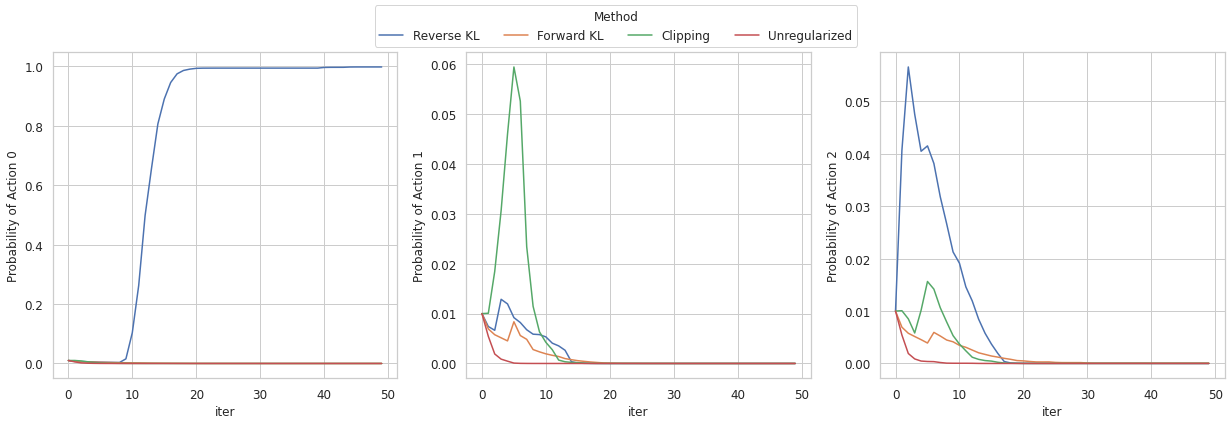

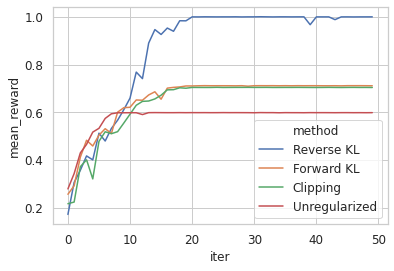

In [29]:
avg_rewards = 0.1 * np.random.randn(100)
avg_rewards[:50] = 0.1 * np.random.randn(50) + 0.5
avg_rewards[0] = 1
env = BanditEnv(avg_rewards=avg_rewards)
data = compare(env, 'discrete', n_steps=50, repeats=1,
               lr=1e-1, batch_size=32, num_minibatches=1, ppo_epochs=10)
plot_results(data)

/home/eecs/chloehsu/ppo_ablation/code-for-paper/analysis/simulated_utils.py:256: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


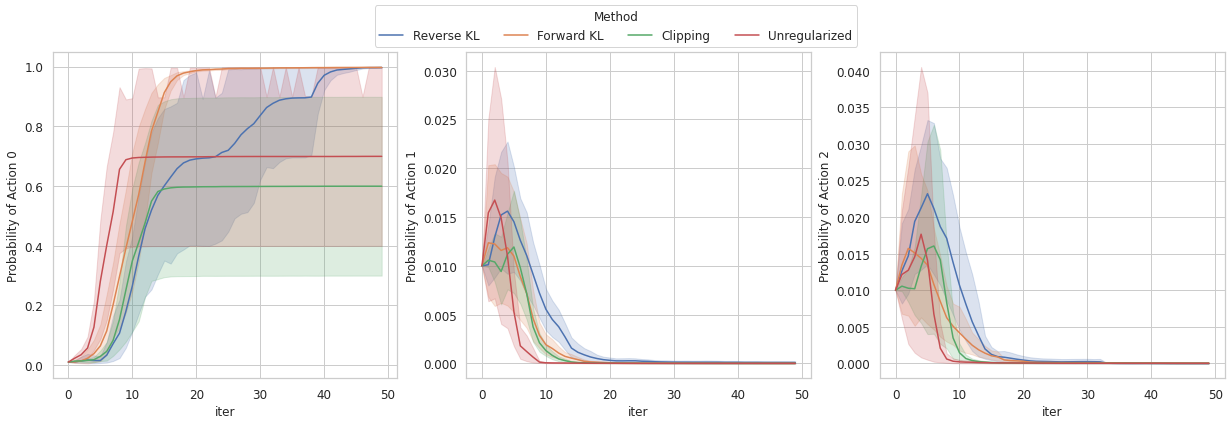

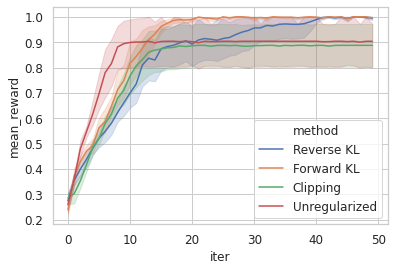

In [30]:
avg_rewards = 0.1 * np.random.randn(100)
avg_rewards[:50] = 0.1 * np.random.randn(50) + 0.5
avg_rewards[0] = 1
env = BanditEnv(avg_rewards=avg_rewards)
data = compare(env, 'discrete', n_steps=50, repeats=10,
               lr=1e-1, batch_size=32, num_minibatches=1, ppo_epochs=10)
plot_results(data)

In [58]:
avg_rewards = 0.1 * np.random.randn(100)
avg_rewards[:50] = 0.1 * np.random.randn(50) + 0.5
avg_rewards[0] = 10
env = BanditEnv(avg_rewards=avg_rewards)
data = compare(env, 'discrete', n_steps=50, repeats=100,
               lr=1e-1, batch_size=32, num_minibatches=1, ppo_epochs=10)
plot_results(data)

/home/eecs/chloehsu/ppo_ablation/code-for-paper/analysis/simulated_utils.py:256: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


KeyboardInterrupt: 

In [57]:
for m in data.method.unique():
    print(m, (filter_df(data, iter=49, method=m).subopt_prob > 0.99).sum())

Reverse KL 0
Forward KL 3
Clipping 3


In [112]:
data_dict = {}
stats_dict = {}
n_iter = 50
for action_dim in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    avg_rewards = 0.1 * np.random.randn(action_dim)
    n_nonzero_actions = int(action_dim / 2)
    avg_rewards[:n_nonzero_actions] = 0.1 * np.random.randn(n_nonzero_actions) + 0.5
    avg_rewards[0] = 1
    env = BanditEnv(avg_rewards=avg_rewards)
    data_dict[action_dim] = compare(env, 'discrete', n_steps=n_iter, repeats=20,
                                    lr=1e-1, batch_size=32, num_minibatches=1, ppo_epochs=10)
    last_iter = deepcopy(filter_df(data_dict[action_dim], iter=n_iter-1))
    last_iter['subopt_prob'] = last_iter[[
        f'pd_param_{i}_mean' for i in range(1, n_nonzero_actions)]].sum(axis=1)
    last_iter['stuck'] = (last_iter.subopt_prob > 0.95)
    last_iter['converge'] = (last_iter.pd_param_0_mean > 0.95)
    stats_dict[action_dim] = last_iter[['method', 'stuck', 'converge']].groupby('method').mean()

/home/eecs/chloehsu/ppo_ablation/code-for-paper/analysis/simulated_utils.py:256: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(self.logits).repeat(


In [114]:
import pickle
with open('discrete_100actions.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [126]:
import pickle
with open('discrete_100actions_stats.pkl', 'wb') as f:
    pickle.dump(stats_combined, f)

In [115]:
stats_combined

,method,stuck,converge,action_dim
38,Reverse KL,0.00,1.00,100
10,Reverse KL,0.00,1.00,30
26,Reverse KL,0.00,1.00,70
22,Reverse KL,0.00,1.00,60
18,Reverse KL,0.00,1.00,50
34,Reverse KL,0.00,1.00,90
14,Reverse KL,0.00,1.00,40
6,Reverse KL,0.00,1.00,20
2,Reverse KL,0.00,1.00,10
30,Reverse KL,0.00,1.00,80


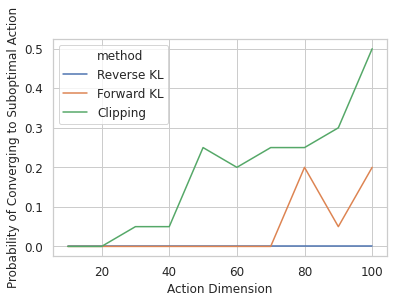

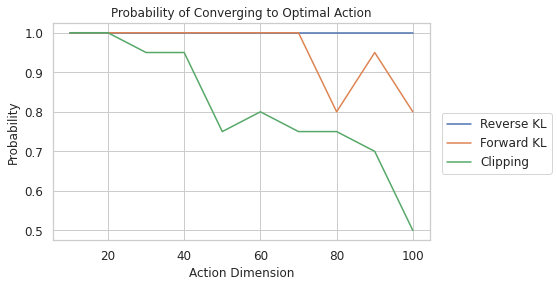

In [158]:
frames = []
for k, df in stats_dict.items():
    df['action_dim'] = k
    frames.append(df)
stats_combined = pd.concat(frames, axis=0).reset_index()
stats_combined = stats_combined[stats_combined.method != 'Unregularized']
stats_combined = stats_combined.sort_values(by='method', ascending=False)

sns.lineplot(data=stats_combined.reset_index(), x='action_dim', y='stuck', hue='method')
plt.xlabel('Action Dimension')
plt.ylabel('Probability of Converging to Suboptimal Action')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.subplots_adjust(right=0.78)
sns.lineplot(data=stats_combined.reset_index(), x='action_dim', y='converge', hue='method', markers=['x'], ax=ax)
plt.xlabel('Action Dimension')
plt.ylabel('Probability')
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
fig.legend(handles[1:], labels[1:], loc='center right', ncol=1)
plt.title('Probability of Converging to Optimal Action')
plt.show()

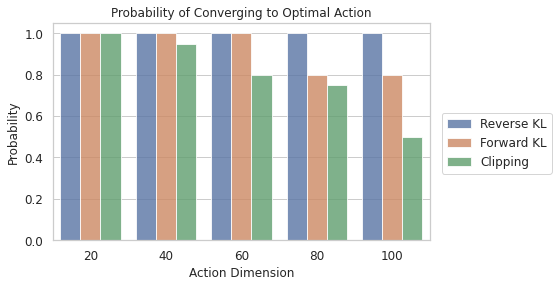

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.subplots_adjust(right=0.78)
sns.barplot(x='action_dim', y='converge',
            data=stats_combined[stats_combined.action_dim % 20 == 0], hue='method', ax=ax, alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlabel('Action Dimension')
ax.set_ylabel('Probability')
fig.legend(handles, labels, loc='center right', ncol=1)
plt.title('Probability of Converging to Optimal Action')
plt.show()


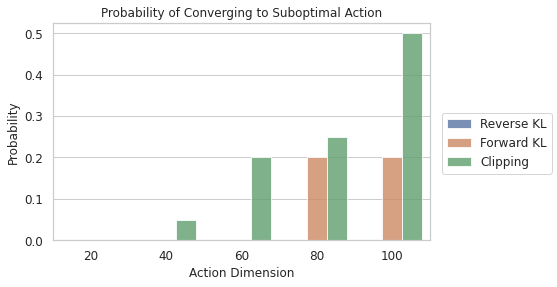

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.subplots_adjust(right=0.78)
sns.barplot(x='action_dim', y='stuck',
            data=stats_combined[stats_combined.action_dim % 20 == 0], hue='method', ax=ax, alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlabel('Action Dimension')
ax.set_ylabel('Probability')
fig.legend(handles, labels, loc='center right', ncol=1)
plt.title('Probability of Converging to Suboptimal Action')
plt.show()


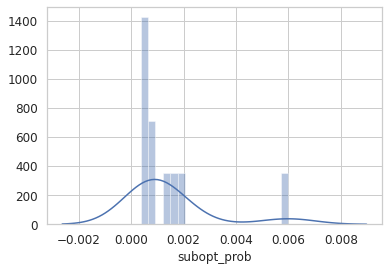

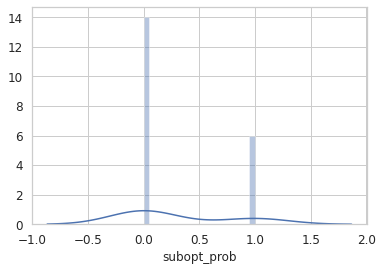

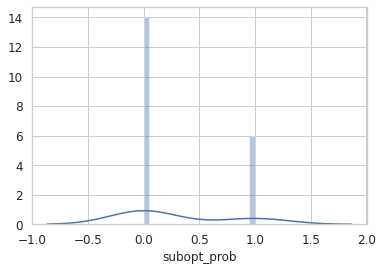

In [51]:
for m in data.method.unique():
    sns.distplot(filter_df(data, iter=49, method=m).subopt_prob, bins=20)
    plt.show()

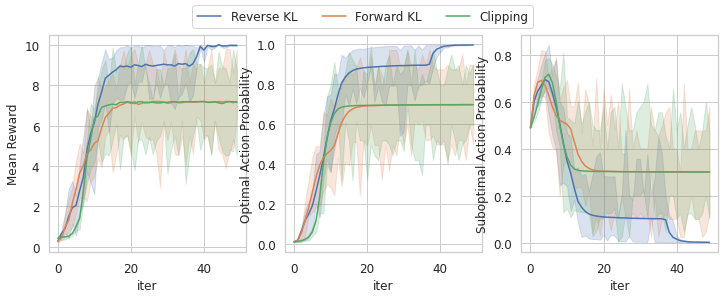

In [41]:
n_boot = 10

data = data[(data.method != 'Unregularized')]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0], n_boot=n_boot)
sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[1], n_boot=n_boot)
data['subopt_prob'] = data[[f'pd_param_{i}_mean' for i in range(1, 50)]].sum(axis=1)
sns.lineplot(data=data, x='iter', y='subopt_prob', hue='method', ax=axes[2], n_boot=n_boot)
axes[0].set_ylabel('Mean Reward')
axes[1].set_ylabel('Optimal Action Probability')
axes[2].set_ylabel('Suboptimal Action Probability')

handles, labels = axes.flatten()[0].get_legend_handles_labels()
for ax in axes.flatten():
    ax.get_legend().remove()
fig.legend(handles[1:], labels[1:], loc='upper center', ncol=4)
plt.show()